In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
import numpy as np
import random
import re

In [97]:
running = pd.read_csv("races.csv")

In [98]:
running = running.sort_values(by = ['distance_n', 'time_seconds'], ascending = True)
running.head()

,gender,distance,distance_n,time,time_seconds,name,rank
0,m,100,100.0,9.58,9.58,Usain Bolt,1
1,m,100,100.0,9.63,9.63,Usain Bolt,2
2,m,100,100.0,9.69,9.69,Usain Bolt,3
3,m,100,100.0,9.69,9.69,Tyson Gay,3
4,m,100,100.0,9.69,9.69,Yohan Blake,3


In [99]:
tlist = running.loc[running['distance'] == 'mara', 'time']
mar_sec = []
for i in tlist:
    hours, minutes, seconds = re.split("\D", i)
    mar_sec.append((int(hours) * 3600) + (int(minutes) * 60) + float(seconds))
running.loc[running['distance'] == 'mara', 'time_seconds'] = mar_sec
running.loc[running['distance'] == 'mara', :]

,gender,distance,distance_n,time,time_seconds,name,rank
43166,m,mara,42164.81,2:02:57,7377.0,Dennis Kimetto,1
43167,m,mara,42164.81,2:03:02,7382.0,Geoffrey Mutai,2
43168,m,mara,42164.81,2:03:03,7383.0,Kenenisa Bekele,3
43169,m,mara,42164.81,2:03:05,7385.0,Eliud Kipchoge,4
43170,m,mara,42164.81,2:03:06,7386.0,Moses Mosop,5
...,...,...,...,...,...,...,...
46081,m,mara,42164.81,2:10:29,7829.0,Yuki Kawauchi,2897
46082,m,mara,42164.81,2:10:29,7829.0,Masato Imai,2897
46083,m,mara,42164.81,2:10:29,7829.0,Hiroaki Sano,2897
46084,m,mara,42164.81,2:10:29,7829.0,Norbert Kigen,2897


In [100]:
running['distance'].describe()

count     48077
unique       11
top        1500
freq       7880
Name: distance, dtype: object

In [101]:
running['distance'].value_counts()

1500     7880
10k      7497
5000     6913
800      6528
mile     4823
400      3545
200      3112
mara     2920
100      2841
hmara    1991
3000       27
Name: distance, dtype: int64

In [102]:
difftypes = running['distance_n'].unique()

In [135]:
print(difftypes)
diffdf = [0] * len(difftypes)
for i in range(len(difftypes)):
    diffdf[i] = running[running['distance_n'] == difftypes[i]]
    

[  100.     200.     400.     800.    1500.    1609.34  3000.    5000.
 10000.   21082.41 42164.81]


In [131]:
highest = [i['time_seconds'].min() for i in diffdf]
highest_norm = highest / difftypes
med = [i['time_seconds'].median() for i in diffdf]
standout = [med[i] / highest[i] for i in range(len(med))]

In [127]:
for i in range(1, 10):
    z = np.polyfit(difftypes, highest, deg = i)
    p = np.poly1d(z)
    fit = []
    for j in range(len(difftypes)):
        fit.append(p(difftypes[j]))
    print("R^2: "+str(r2_score(highest, fit)))

R^2: 0.9992108099655649
R^2: 0.999971116819103
R^2: 0.9999959820117988
R^2: 0.9999976018069093
R^2: 0.9999989467824937
R^2: 0.9999996576378357
R^2: 0.9999998964794443
R^2: 0.9999999904947107
R^2: 0.9999999978305851


[9.58, 19.19, 43.03, 100.91, 206.0, 223.13, 440.67, 757.35, 1577.53, 3503.0, 7377.0]
[0.0958     0.09595    0.107575   0.1261375  0.13733333 0.1386469
 0.14689    0.15147    0.157753   0.16615747 0.17495632]
[  100.     200.     400.     800.    1500.    1609.34  3000.    5000.
 10000.   21082.41 42164.81]
[9.883018086244123, 19.766034133928077, 39.53175231203715, 79.06249577586742, 148.24103887285216, 159.04667875267538, 296.4801305788272, 494.1319958003897, 988.2597250078151, 2083.477639710528, 4166.929102118226]


<function matplotlib.pyplot.show(close=None, block=None)>

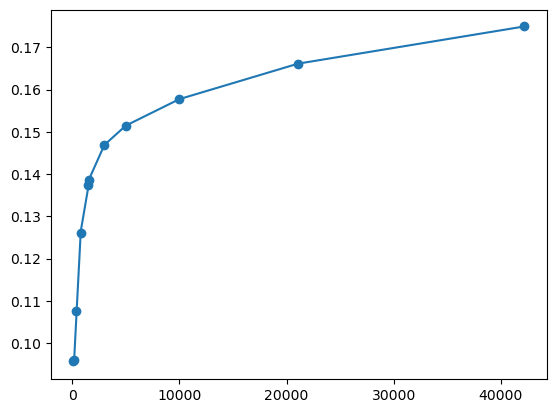

In [113]:
z = np.polyfit(difftypes, highest_norm, deg = 9)
p = np.poly1d(z)
plt.scatter(difftypes, highest_norm)
plt.plot(difftypes, p(difftypes))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

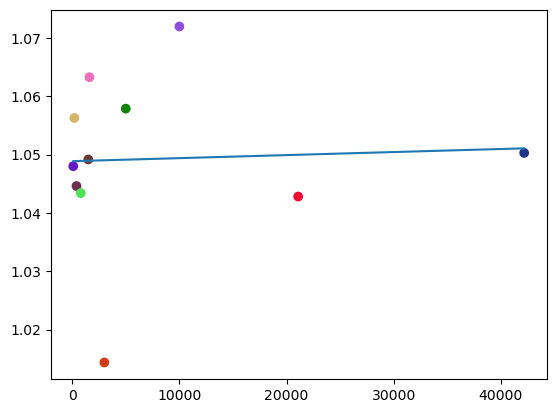

In [147]:
z2 = np.polyfit(difftypes, standout, deg = 1)
p2 = np.poly1d(z2)
colors = color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(11)]
plt.scatter(difftypes, standout, c=colors)
plt.plot(difftypes, p2(difftypes))
plt.show

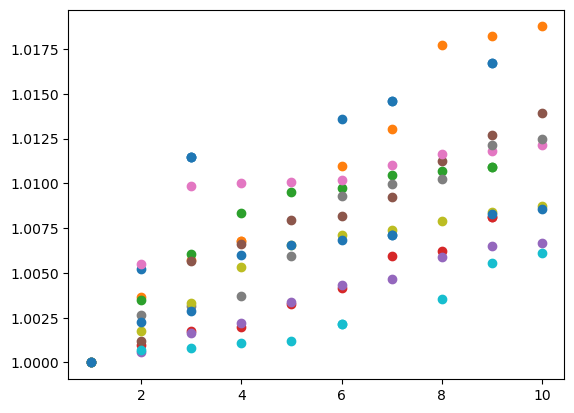

In [68]:
for i in diffdf:
    time = list(i.iloc[0:10, 4])
    time_norm = [(tim / i.iloc[0,4]) for tim in time]
    rank = list(i.iloc[0:10, 6])
    plt.scatter(rank, time_norm)